# **STUNTING DATASET PREDICTION FOR THE KIDCARE APPLICATION**

#  **IMPORT LIBRARIES**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# **LOAD DATASET**

In [37]:
print("Dataset Preview:")
df = pd.read_csv('Dataset_Stunting.csv')
print(df.head())

Dataset Preview:
   umur Jenis Kelamin  Berat Badan  Panjang Badan  Lingkar Kepala Keterangan
0     0     Laki Laki          2.0           50.0            30.0   stunting
1     0     Laki Laki          1.0           45.0            36.0   stunting
2     0     Laki Laki          4.0           41.0            32.0   stunting
3     0     Laki Laki          2.0           43.0            34.0   stunting
4     0     Laki Laki          2.0           47.0            30.0   stunting


# **PREPROCESSING**

In [38]:
# Display dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   umur            6000 non-null   int64  
 1   Jenis Kelamin   6000 non-null   object 
 2   Berat Badan     6000 non-null   float64
 3   Panjang Badan   6000 non-null   float64
 4   Lingkar Kepala  6000 non-null   float64
 5   Keterangan      6000 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 281.4+ KB


In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
umur              0
Jenis Kelamin     0
Berat Badan       0
Panjang Badan     0
Lingkar Kepala    0
Keterangan        0
dtype: int64


In [40]:
# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())
df.describe()


Number of Duplicates: 210


,umur,Berat Badan,Panjang Badan,Lingkar Kepala
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,30.030833,12.551399,90.543056,34.841102
std,17.752720,4.669063,19.274193,1.968745
min,0.000000,1.000000,40.000000,30.000000
25%,14.750000,9.000000,77.000000,34.000000
50%,30.500000,13.000000,90.000000,35.000000
75%,45.250000,16.041012,106.504856,36.053462
max,60.000000,26.011980,130.888663,39.207424


In [41]:
# Remove duplicate entries
df = df.drop_duplicates()
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [42]:
# Rename columns for better readability
df = df.rename(columns={
    'umur': 'Umur',
    'Keterangan': 'Status Gizi',
    'Panjang Badan': 'Tinggi Badan'
})

df.head(50)

,Umur,Jenis Kelamin,Berat Badan,Tinggi Badan,Lingkar Kepala,Status Gizi
0,0,Laki Laki,2.0,50.0,30.0,stunting
1,0,Laki Laki,1.0,45.0,36.0,stunting
2,0,Laki Laki,4.0,41.0,32.0,stunting
3,0,Laki Laki,2.0,43.0,34.0,stunting
4,0,Laki Laki,2.0,47.0,30.0,stunting
5,0,Laki Laki,1.0,46.0,33.0,stunting
6,0,Laki Laki,2.0,52.0,32.0,stunting
7,0,Laki Laki,3.0,44.0,36.0,stunting
8,0,Laki Laki,4.0,47.0,35.0,tidak stunting
9,0,Laki Laki,2.0,48.0,32.0,stunting


In [43]:
# Display the dimensions of the dataset (number of rows and columns)
df.shape

(5790, 6)

5790 rows (data observations or entries), 6 columns (features or variables in the data)

# **EXPLORATORY DATA ANALYSIS (EDA)**

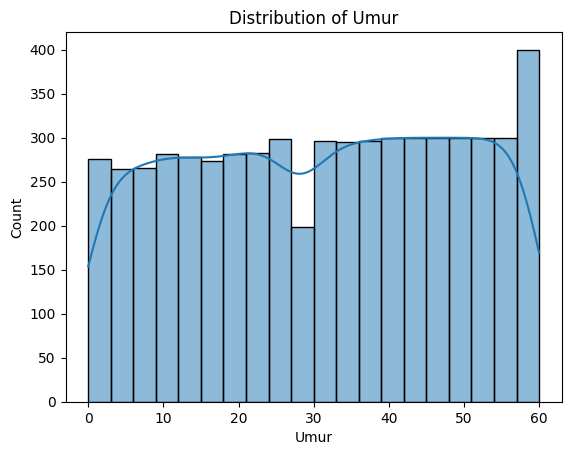

In [44]:
# EDA 1 (Visualize the distribution of Umur)
sns.histplot(df['Umur'], bins=20, kde=True)
plt.title('Distribution of Umur')
plt.show()

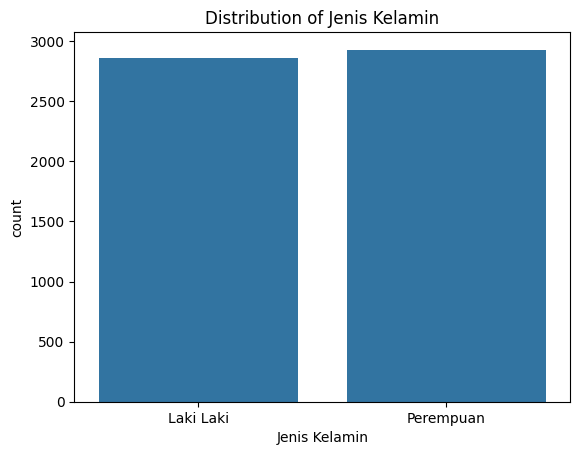

In [45]:
# EDA 2 (Visualize the distribution of Jenis Kelamin)
sns.countplot(x='Jenis Kelamin', data=df)
plt.title('Distribution of Jenis Kelamin')
plt.show()

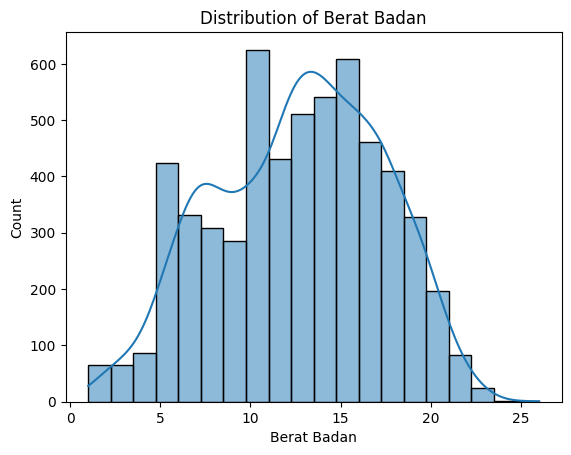

In [46]:
# EDA 3 (Visualize the distribution of Berat Badan)
sns.histplot(df['Berat Badan'], bins=20, kde=True)
plt.title('Distribution of Berat Badan')
plt.show()

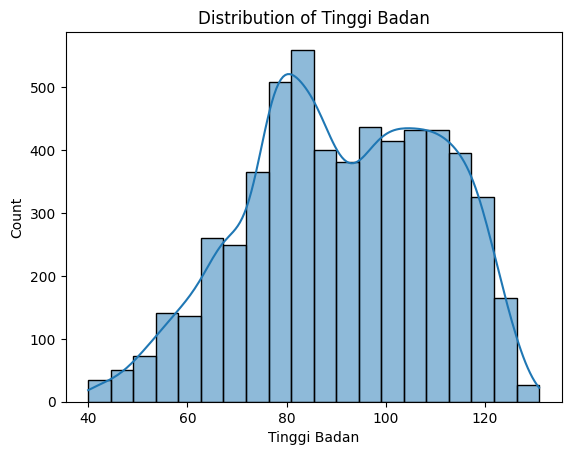

In [47]:
# EDA 4 (Visualize the distribution of Tinggi Badan)
sns.histplot(df['Tinggi Badan'], bins=20, kde=True)
plt.title('Distribution of Tinggi Badan')
plt.show()

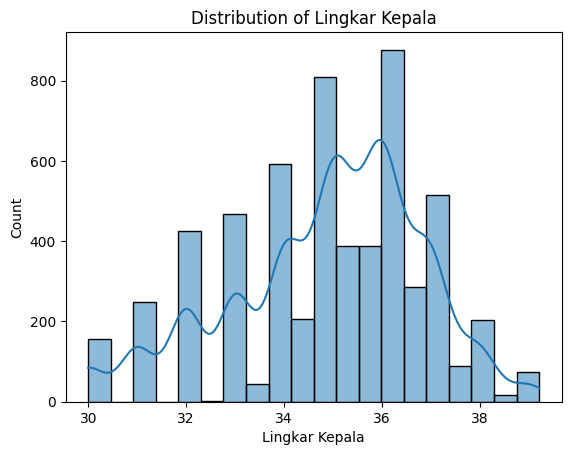

In [48]:
# EDA 5 (Visualize the distribution of Lingkar Kepala)
sns.histplot(df['Lingkar Kepala'], bins=20, kde=True)
plt.title('Distribution of Lingkar Kepala')
plt.show()

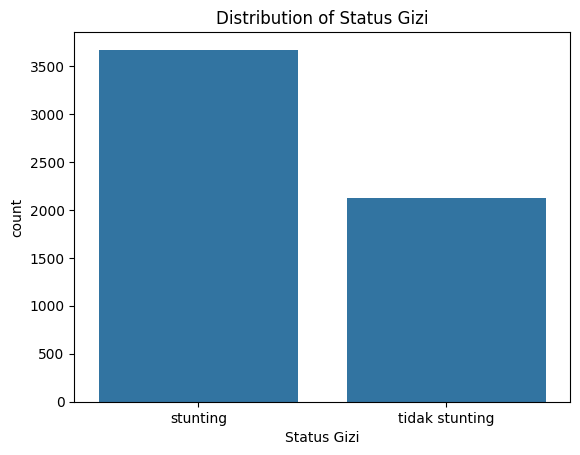

In [49]:
# EDA 6 (Visualize the distribution of Status Gizi)
sns.countplot(x='Status Gizi', data=df)
plt.title('Distribution of Status Gizi')
plt.show()

# **MODEL ARCHITECTURE USING TENSORFLOW'S DNN**

In [50]:
# Check unique values in the 'Jenis Kelamin' (Gender) and 'Status Gizi' (Nutritional Status) columns
print(df['Jenis Kelamin'].unique())
print(df['Status Gizi'].unique())

['Laki Laki' 'Perempuan']
['stunting' 'tidak stunting']


In [51]:
# Apply encoding to the 'Jenis Kelamin' (Gender) and 'Status Gizi' (Nutritional Status) columns
Jenis_Kelamin_encoding = {'Laki Laki': 1, 'Perempuan': 0}
Status_Gizi_encoding = {'tidak stunting': 0, 'stunting': 1}

df['Jenis Kelamin'] = df['Jenis Kelamin'].map(Jenis_Kelamin_encoding)
df['Status Gizi'] = df['Status Gizi'].map(Status_Gizi_encoding)

# Display the first 50 rows of the updated dataframe
df.head(50)

,Umur,Jenis Kelamin,Berat Badan,Tinggi Badan,Lingkar Kepala,Status Gizi
0,0,1,2.0,50.0,30.0,1
1,0,1,1.0,45.0,36.0,1
2,0,1,4.0,41.0,32.0,1
3,0,1,2.0,43.0,34.0,1
4,0,1,2.0,47.0,30.0,1
5,0,1,1.0,46.0,33.0,1
6,0,1,2.0,52.0,32.0,1
7,0,1,3.0,44.0,36.0,1
8,0,1,4.0,47.0,35.0,0
9,0,1,2.0,48.0,32.0,1


In [52]:
# Separate features dan target
X = df[['Umur', 'Jenis Kelamin', 'Berat Badan', 'Tinggi Badan', 'Lingkar Kepala']].values
y = df['Status Gizi'].values

# Check the dimensions of the data
print("Dimensions of X:", X.shape)
print("Dimensions of y:", y.shape)

Dimensions of X: (5790, 5)
Dimensions of y: (5790,)


In [53]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the dimensions after oversampling
print("Dimensions of X after SMOTE:", X_resampled.shape)
print("Distribution of y after SMOTE:", np.bincount(y_resampled))

Dimensions of X after SMOTE: (7338, 5)
Distribution of y after SMOTE: [3669 3669]


In [54]:
# Normalize the data
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Check the data after normalization
print("Sample data after normalization:")
print(X_resampled[:5])

Sample data after normalization:
[[0.         1.         0.03998084 0.11002472 0.        ]
 [0.         1.         0.         0.05501236 0.65164804]
 [0.         1.         0.11994252 0.01100247 0.21721601]
 [0.         1.         0.03998084 0.03300742 0.43443203]
 [0.         1.         0.03998084 0.07701731 0.        ]]


In [55]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the dimensions of the data after the split
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)

Dimensions of X_train: (5870, 5)
Dimensions of X_test: (1468, 5)


In [56]:
# Convert the list to a numpy array
classes = np.array([0, 1])

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=df['Status Gizi'].values)
print("Class Weights:", class_weights)

Class Weights: [1.36492221 0.78904334]


In [57]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,         # Wait for 10 epochs without improvement
                               restore_best_weights=True)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the EarlyStopping callback
history = model.fit(X_train, y_train, class_weight={0: 1.36492221, 1: 0.78904334}, validation_data=(X_test, y_test), epochs=1000, batch_size=32, callbacks=[early_stopping])

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5246 - loss: 0.6764 - val_accuracy: 0.6199 - val_loss: 0.6690
Epoch 2/1000
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.5936 - val_accuracy: 0.7010 - val_loss: 0.5680
Epoch 3/1000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6957 - loss: 0.5453 - val_accuracy: 0.7527 - val_loss: 0.5099
Epoch 4/1000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7407 - loss: 0.4954 - val_accuracy: 0.7847 - val_loss: 0.4650
Epoch 5/1000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7775 - loss: 0.4597 - val_accuracy: 0.8106 - val_loss: 0.4396
Epoch 6/1000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4328 - val_accuracy: 0.7493 - val_loss: 0.4621
Epoch 7/1000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4002 - val_accuracy: 0.7997 - val_loss: 0.4137
Epoch 8/1000
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8233 - loss: 0.3907 - val_accuracy:

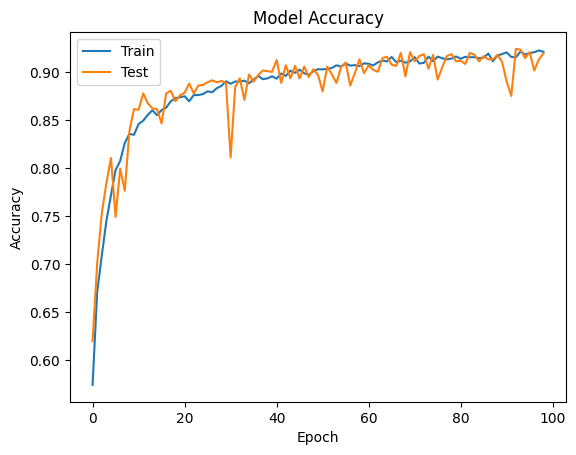

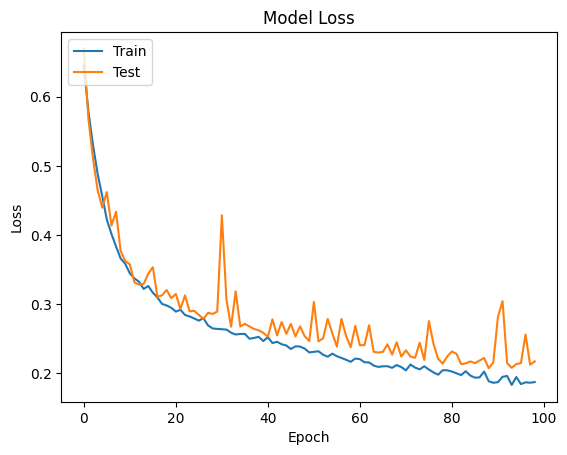

In [58]:
# Plot model accuracy for train and test sets
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot model loss for train and test sets
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [59]:
# Display the model architecture summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

# **MODEL EVALUATION**

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert continuous variable to binary labels
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9207 - loss: 0.1932
Test Accuracy: 0.9183


In [61]:
# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       747
           1       0.94      0.89      0.91       721

    accuracy                           0.92      1468
   macro avg       0.92      0.92      0.92      1468
weighted avg       0.92      0.92      0.92      1468



In [62]:
# Normalize the input data using the scaler
input1 = scaler.transform(np.array([[52, 1, 17, 111, 34]]))
prediction1 = model.predict(input1)
print(f"Prediction for the first input: {prediction1}")

if prediction1[0] > threshold:
    print("Status Gizi: Stunting")
else:
    print("Status Gizi: Tidak Stunting")

# Normalize the second input
input2 = scaler.transform(np.array([[52, 0, 15, 116, 36]]))
prediction2 = model.predict(input2)
print(f"Prediction for the second input: {prediction2}")

if prediction2[0] > threshold:
    print("Status Gizi: Stunting")
else:
    print("Status Gizi: Tidak Stunting")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction for the first input: [[0.98077494]]
Status Gizi: Stunting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for the second input: [[0.09626283]]
Status Gizi: Tidak Stunting


In [ ]:
model.save('kidcare.h5')

In [64]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model in the current working directory
with open('kidcare.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved as 'kidcare.tflite'")

Saved artifact at '/tmp/tmpjolslzqf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135996678671696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135996678778096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135996678779152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135996678772992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135996678782672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135996678780736: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved as 'kidcare.tflite'


In [ ]:
# Install TensorFlow.js
!pip install tensorflowjs

In [ ]:
# Convert and save the model to TensorFlow.js format
!tensorflowjs_converter --input_format keras kidcare.h5 tfjs_model